# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
vehiclebase = pd.read_csv('C:/Users/JosephCanlas/OneDrive - Aireon LLC/Documents/ML_AI Class/Module 11/data/vehicles.csv')

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [3]:
# The goal is to provide your dealership with better information on how to optomize pricing for car sales based on attributes of the product.
# This will enable you to better list and sell inventory.
# To do so, a predictive model using industry used car data will be preprocessed and with conducted feature engineering, this can provide a predictive model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
len(vehiclebase)
# There are 426880 rows with 18 columns of data 
vehiclebase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
vehicle = vehiclebase.drop(['region', 'id', 'state','VIN','model','size'],axis=1)
vehicle = vehicle.dropna()
vehicle.info()
#I look to drop categorical features where there are too many categories which would present a large amount of data when encoded
#and categorical features with categories that present low frequency or low variety (i.e. Majority of data is in one category and therefore not useful)
#consider dropping manufacturer, transmission, title_status, fuel, and cylinders for these reasons, but first we should try
# to keep these first and build a model around this data. Can always come back and assess if our model isnt sufficient

#Remove region id and state (location data may not be useful)
#Model has a ton of variety for a categorical column this may not be useful
#Dropping any columns that have more than 50% null values (size)
#and lastly dropping null values 

<class 'pandas.core.frame.DataFrame'>
Index: 117169 entries, 31 to 426878
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   title_status  117169 non-null  object 
 8   transmission  117169 non-null  object 
 9   drive         117169 non-null  object 
 10  type          117169 non-null  object 
 11  paint_color   117169 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 11.6+ MB


In [6]:
#list of unique values mostly useful for category features
number_unique = vehiclebase.nunique(axis=0)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\3461992204.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='manufacturer', y='price',


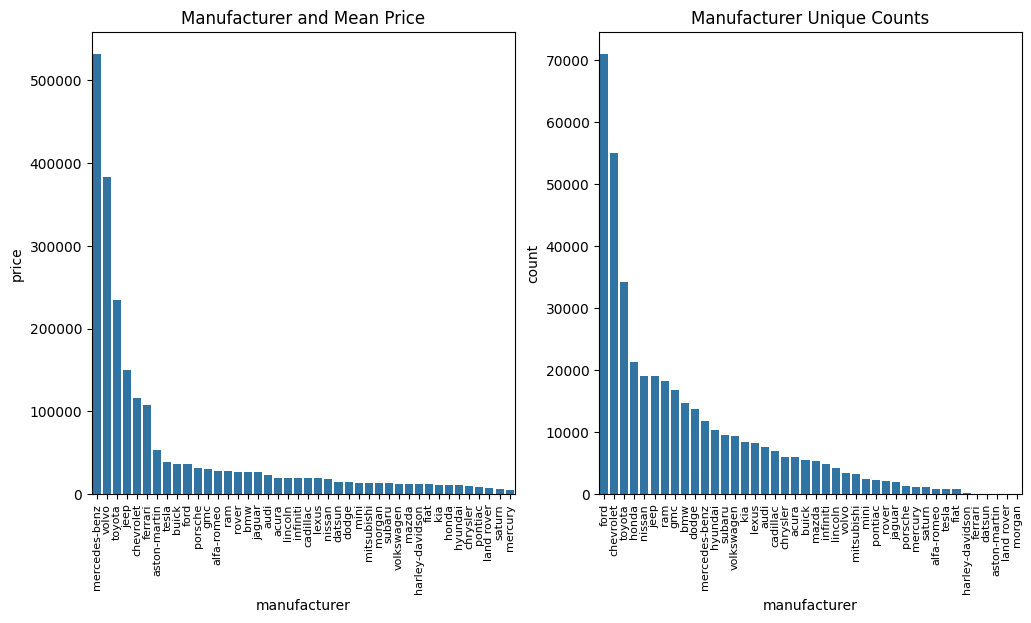

In [7]:
#Manufacturer
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('manufacturer')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='manufacturer', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('Manufacturer and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['manufacturer'],ax=axes[1],order = vehiclebase['manufacturer'].value_counts().index)
axes[1].set_title('Manufacturer Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\1469809901.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='condition', y='price',


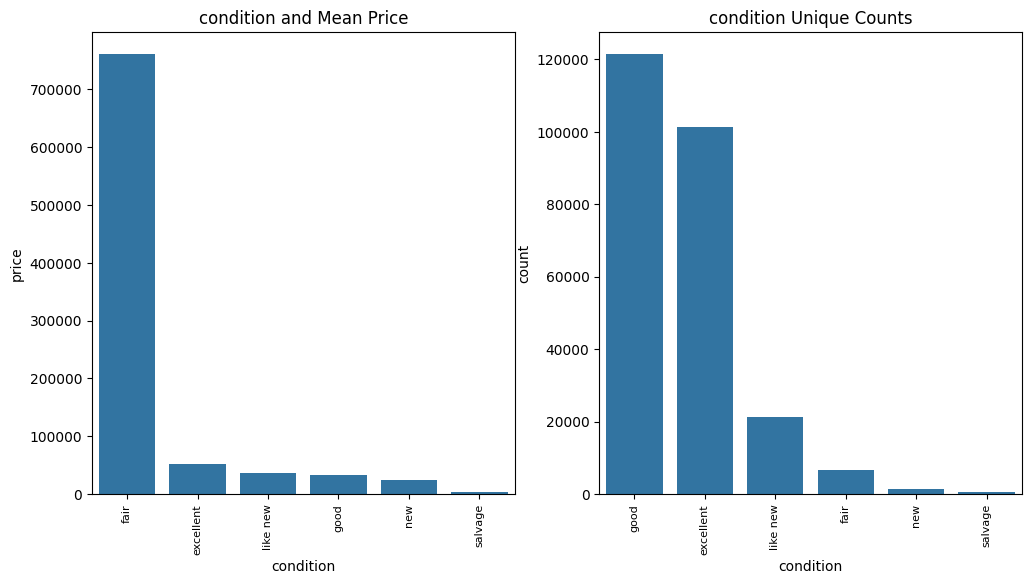

In [8]:
#condition     
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('condition')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='condition', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('condition and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['condition'],ax=axes[1],order = vehiclebase['condition'].value_counts().index)
axes[1].set_title('condition Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\213075885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='cylinders', y='price',


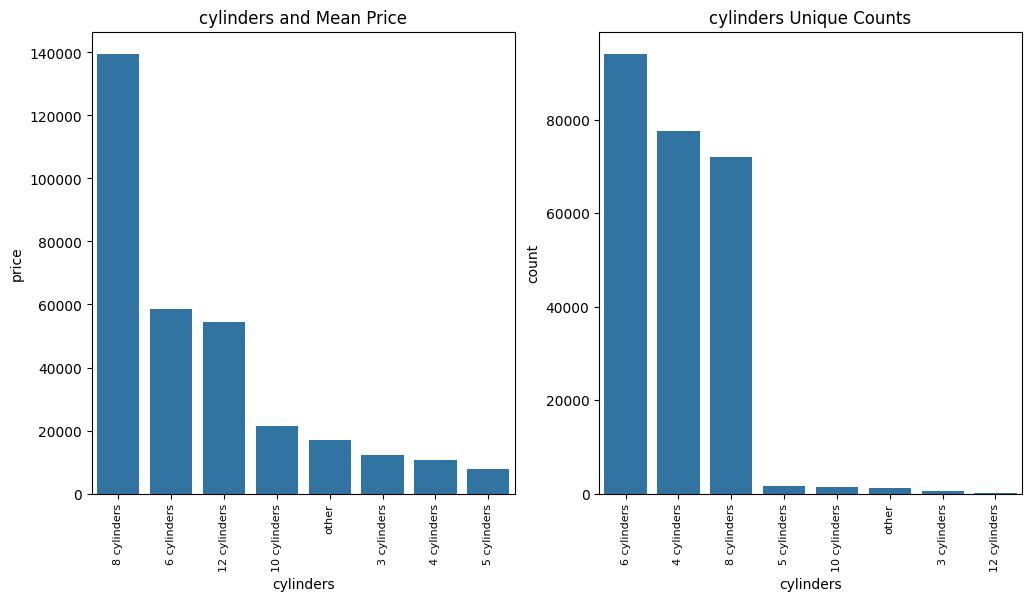

In [9]:
# Cylinders
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('cylinders')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='cylinders', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('cylinders and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['cylinders'],ax=axes[1], order = vehiclebase['cylinders'].value_counts().index)
axes[1].set_title('cylinders Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\3524585240.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='fuel', y='price',


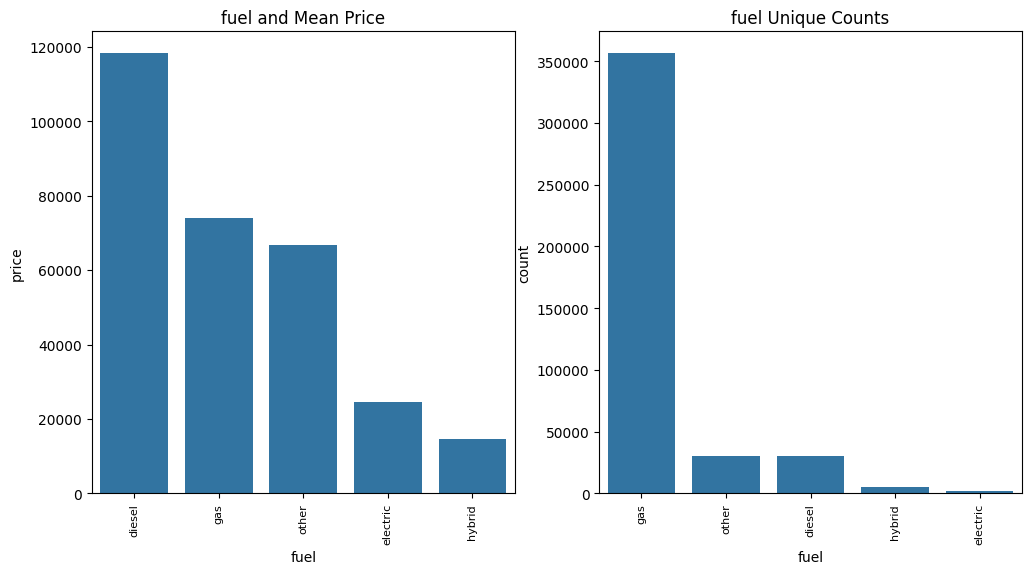

In [10]:
# Fuel
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('fuel')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='fuel', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('fuel and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['fuel'],ax=axes[1], order = vehiclebase['fuel'].value_counts().index)
axes[1].set_title('fuel Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\2030134380.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='title_status', y='price',


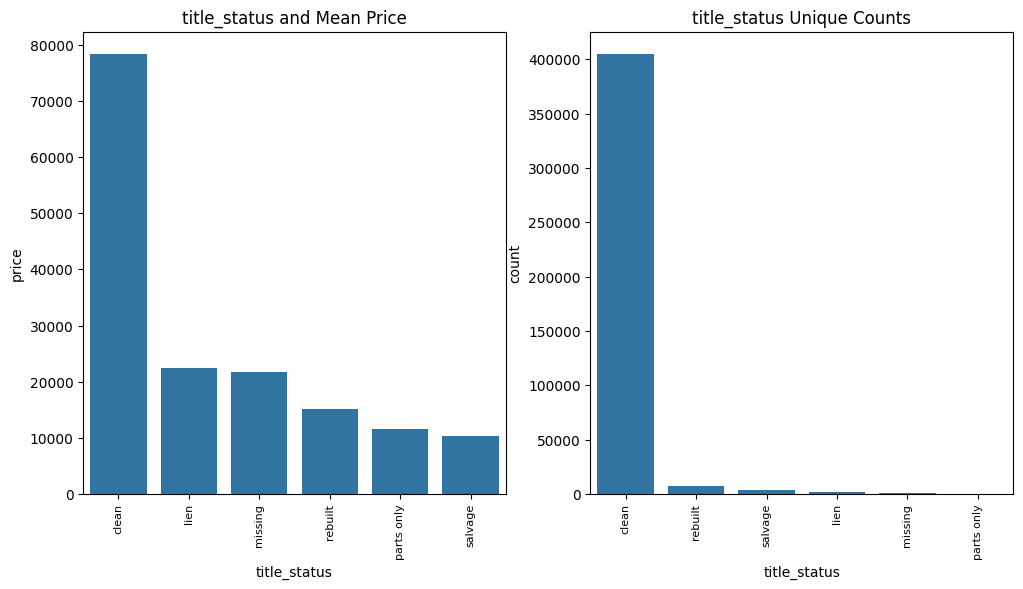

In [11]:
# title status
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('title_status')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='title_status', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('title_status and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['title_status'],ax=axes[1], order = vehiclebase['title_status'].value_counts().index)
axes[1].set_title('title_status Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\3724692393.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='transmission', y='price',


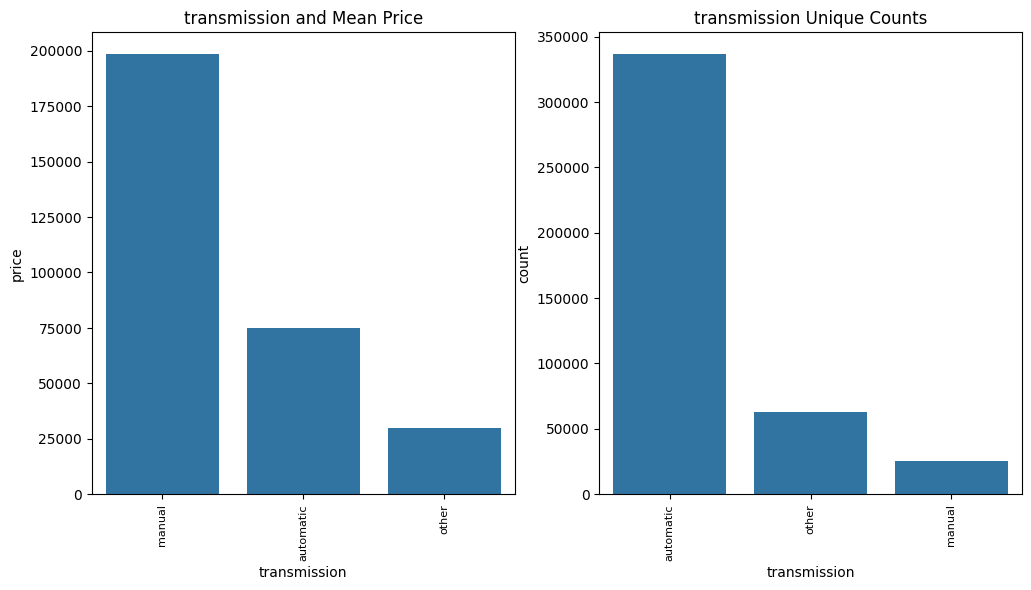

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('transmission')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='transmission', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('transmission and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['transmission'],ax=axes[1], order = vehiclebase['transmission'].value_counts().index)
axes[1].set_title('transmission Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\2659863479.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='drive', y='price',


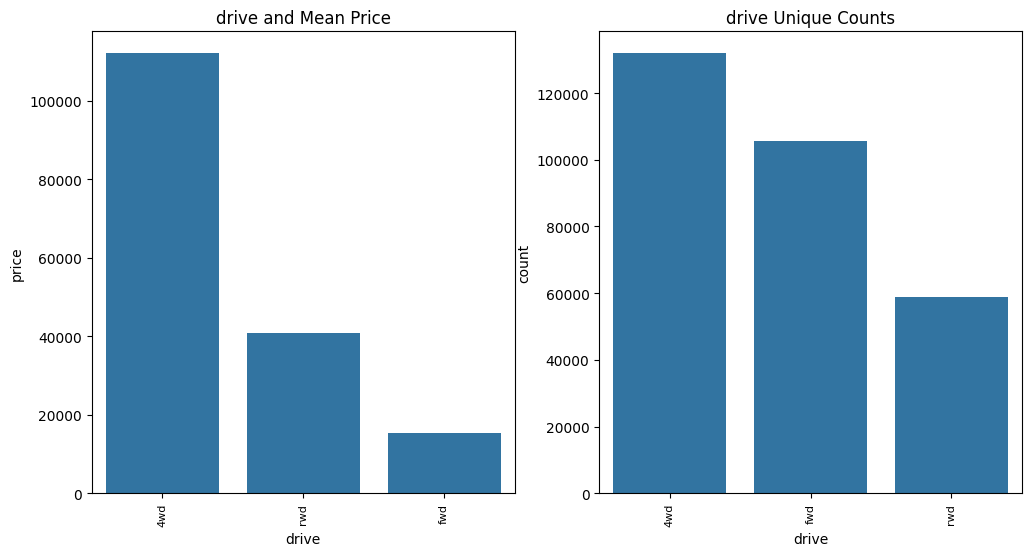

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('drive')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='drive', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('drive and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['drive'],ax=axes[1], order = vehiclebase['drive'].value_counts().index)
axes[1].set_title('drive Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\3330986038.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='paint_color', y='price',


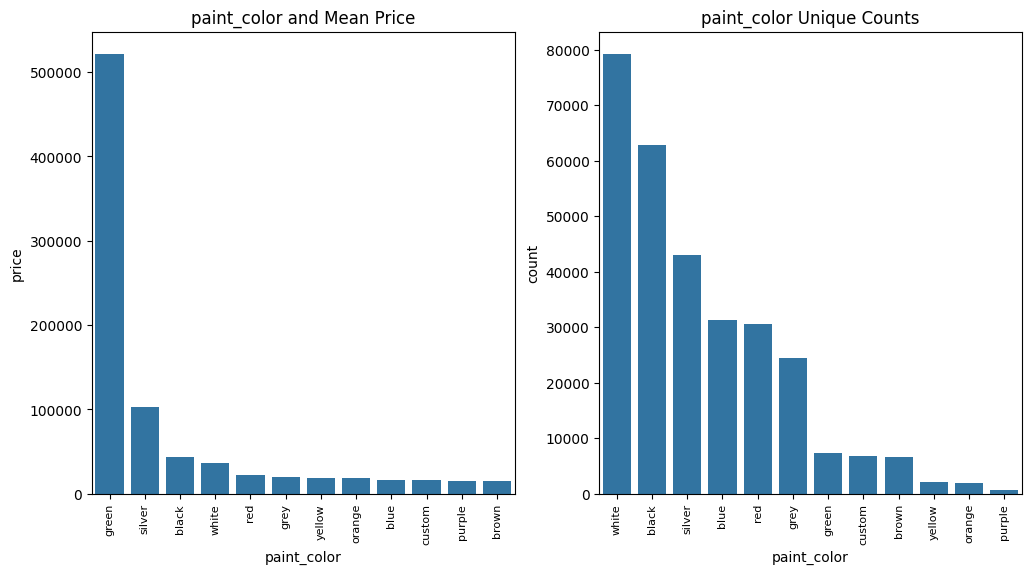

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('paint_color')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='paint_color', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('paint_color and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['paint_color'],ax=axes[1], order = vehiclebase['paint_color'].value_counts().index)
axes[1].set_title('paint_color Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

C:\Users\JosephCanlas\AppData\Local\Temp\ipykernel_26372\1055253633.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  cc = sns.barplot(data=vehiclebase, x='type', y='price',


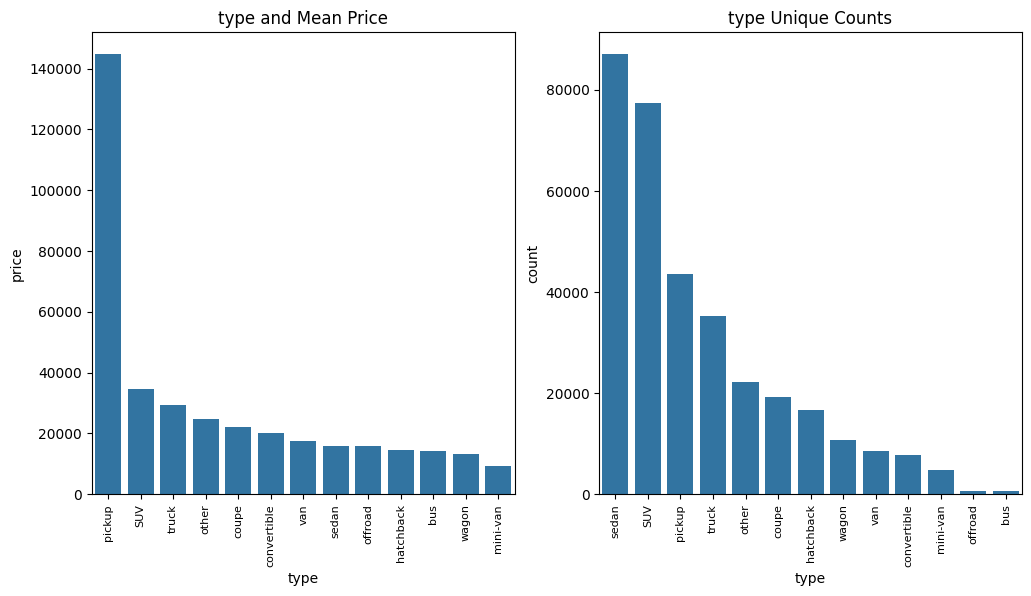

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_order = vehiclebase.groupby('type')['price'].mean().sort_values(ascending=False).index.values
cc = sns.barplot(data=vehiclebase, x='type', y='price',
            estimator='mean', ci=None,order=plot_order,ax=axes[0])
axes[0].set_title('type and Mean Price')
axes[0].tick_params(axis='x', labelrotation=90,labelsize=8)
cc2 = sns.countplot(x=vehiclebase['type'],ax=axes[1], order = vehiclebase['type'].value_counts().index)
axes[1].set_title('type Unique Counts')
axes[1].tick_params(axis='x', labelrotation=90,labelsize=8)

Text(0.5, 1.0, 'Odometer Distribution')

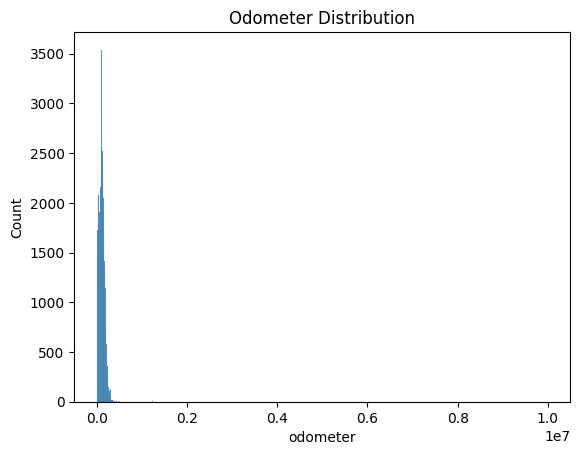

In [16]:
#looking at numerical values
#Odometer
sns.histplot(vehicle['odometer']).set_title('Odometer Distribution')
#Left Skewed Data Most data is below 300K can be filtered


Text(0.5, 1.0, 'Year Distribution')

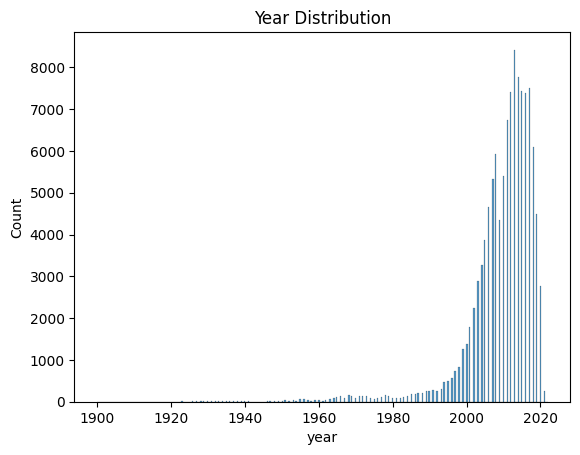

In [17]:
#Year
#Majority of data above 1990
sns.histplot(vehicle['year']).set_title('Year Distribution')


Text(0.5, 1.0, 'Price Log Scale Distribution')

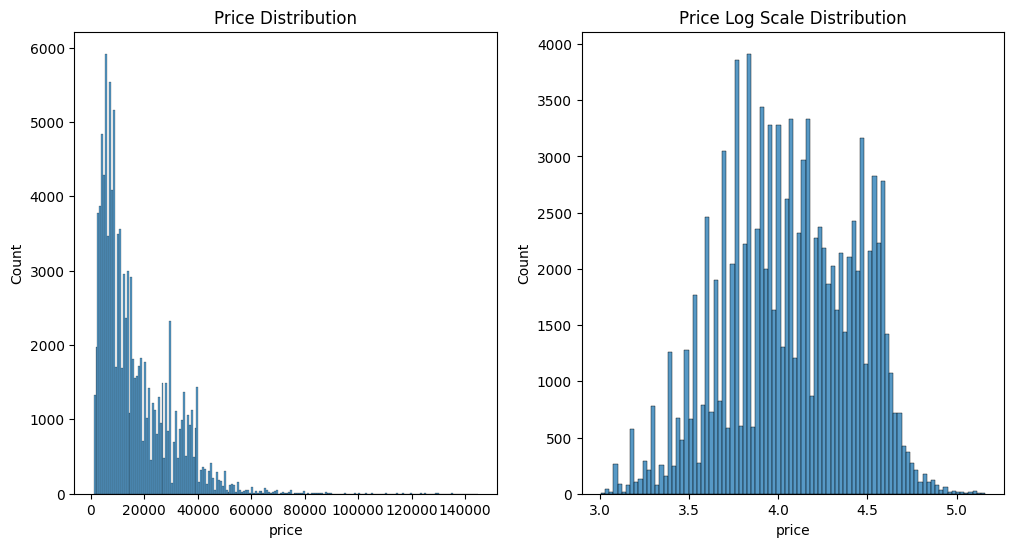

In [18]:
#Price
# Prices at 0 and an assumption of a used car below 1000 may be unreasonable
# Used cars on the high end > 150000 are rare and can be seen as outliers
x = vehicle['price'][(vehicle['price'] > 1000) & (vehicle['price'] < 150000)]
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(x,ax=axes[0]).set_title('Price Distribution')
axes[0].set_title('Price Distribution')
# #data is still fairly right skewed taking the log of the target variable may be needed
sns.histplot(np.log10(x),ax=axes[1]).set_title('Price Distribution')
axes[1].set_title('Price Log Scale Distribution')



### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [19]:
categorical_columns = vehicle.select_dtypes(include=['object']).columns.to_list()
num_columns = ['year','odometer']

In [20]:
#Filter Data to majority price data
vehicle_final = vehicle.loc[(vehicle['price'] > 1000) & (vehicle['price'] < 250000)]

In [21]:
#majority of data occurs from 1990 onward
vehicle_final = vehicle_final.loc[(vehicle_final['year'] > 1990)]


In [22]:
#Filter Data to majority odometer data
vehicle_final = vehicle_final.loc[(vehicle_final['odometer']>0)&(vehicle_final['odometer']<300000)]


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge, Lasso


import warnings
warnings.filterwarnings("ignore")

In [24]:
categorical_columns = vehicle_final.select_dtypes(include=['object']).columns.to_list()
num_columns = ['year','odometer']


In [25]:
#split data into training and test sets 
X = vehicle_final.drop(['price'], axis = 1)
y = vehicle_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import scipy as sp
from sklearn.linear_model import RidgeCV
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"),categorical_columns),
    (StandardScaler(), num_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas,store_cv_values=True),func=np.log1p, inverse_func=np.expm1
    ),
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                                                              store_cv_values=True)))])

In [27]:
targref = model[-1]
CV_values = np.mean(targref.regressor_.cv_values_, axis =0 )
minerr = np.min(CV_values, axis=0)
alpha_best = alphas[CV_values==minerr]
print(alpha_best)

[0.1]


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [28]:
# Build Models
ridge_pipe = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=0.1),func=np.log1p, inverse_func=np.expm1
    ),
)
lasso_pipe = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Lasso(alpha=0.1),func=np.log1p, inverse_func=np.expm1)
)
# , func=np.log10, inverse_func=sp.special.exp10

In [29]:
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Lasso(alpha=0.1)))])

In [30]:
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=Ridge(alpha=0.1)))])

In [31]:
results = {}
y_pred = lasso_pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results['Lasso_Test'] = {'RMSE': rmse, 'R2': r2}
print(f"{'Lasso'}: Test RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Lasso: Test RMSE = 9672.7710, R2 = 0.4628


In [32]:
y_pred_train = lasso_pipe.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
results['Lasso_Train'] = {'RMSE': rmse, 'R2': r2}
print(f"{'Lasso'}: Train RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Lasso: Train RMSE = 9761.4691, R2 = 0.4604


In [33]:
results = {}
y_pred = ridge_pipe.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results['Ridge_Test'] = {'RMSE': rmse, 'R2': r2}
print(f"{'Ridge'}: Test RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Ridge: Test RMSE = 6339.6408, R2 = 0.7693


In [34]:
y_pred_train = ridge_pipe.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
results['Ridge_Train'] = {'RMSE': rmse, 'R2': r2}
print(f"{'Ridge'}: Train RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Ridge: Train RMSE = 6359.9943, R2 = 0.7710


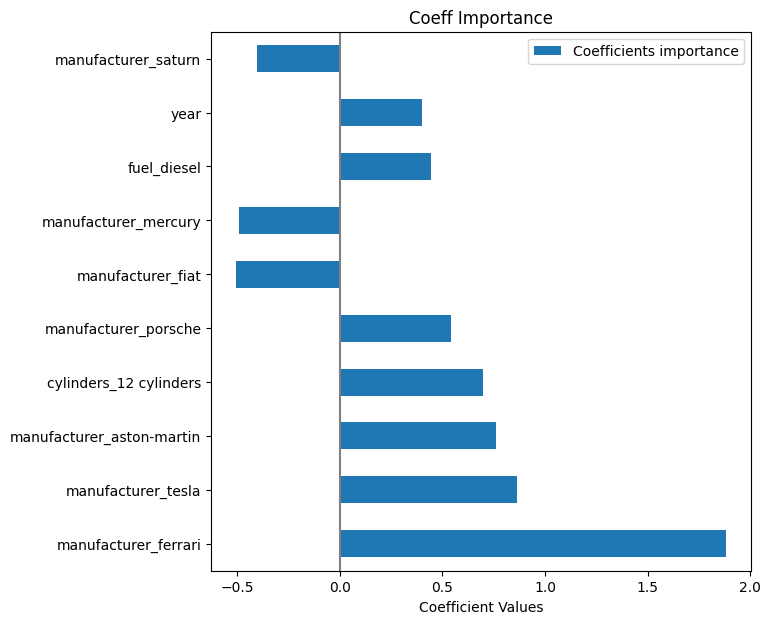

In [35]:
# Get Top Coefficients to see some relationships between the encoded values 
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)

coefs = coefs.sort_values(by='Coefficients importance', key=abs, ascending=False)
top_coefs = coefs.iloc[0:10]
top_coefs.plot(kind="barh", figsize=(9, 7), title = 'Coeff Importance')
plt.xlabel("Coefficient Values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [36]:
# See Read ME